# Applying 1. Salt-and-pepper Noise, 2. Gaussian Noise, and removing using Mean Filtering

### 1. Salt and Pepper Noise

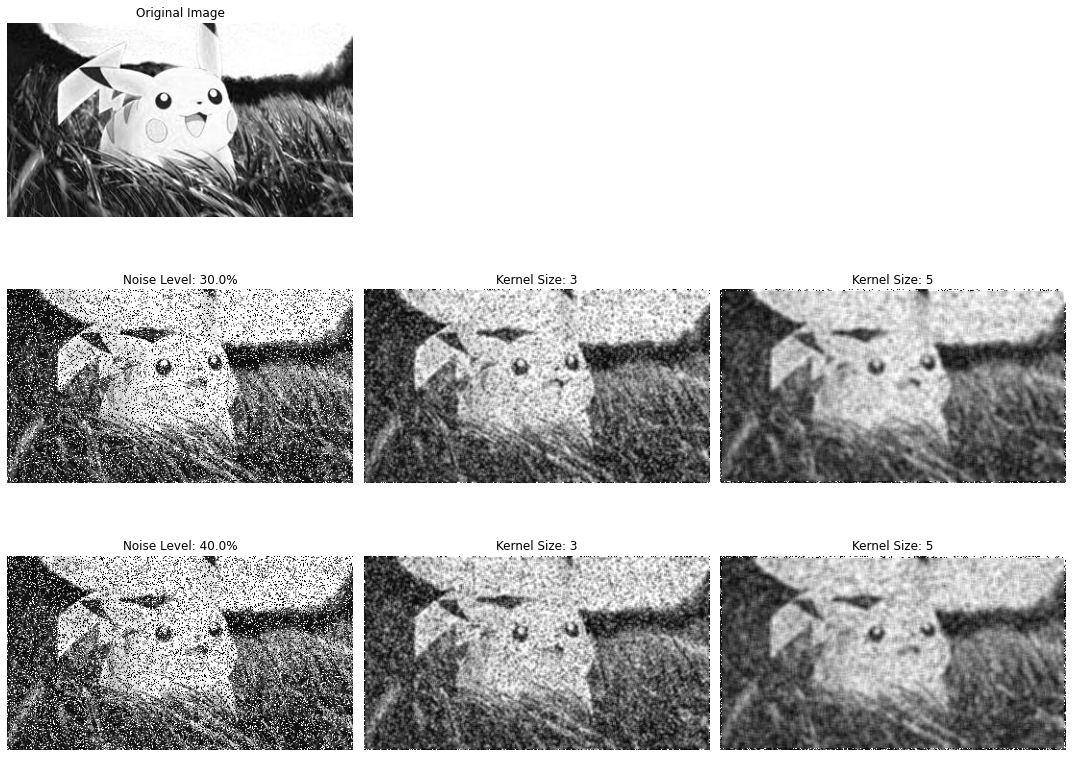

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image using PIL
image_path = r"D:\1st_Year_QMS\2nd_Sem\PR\pikachu_bw.jpeg"
image = Image.open(image_path).convert('L')
image = np.array(image)

# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape
    salt = np.ceil(salt_prob * row * col)
    pepper = np.ceil(pepper_prob * row * col)

    # Add salt noise
    salt_coords = np.random.randint(0, row, int(salt)), np.random.randint(0, col, int(salt))
    noisy_image[salt_coords] = 255

    # Add pepper noise
    pepper_coords = np.random.randint(0, row, int(pepper)), np.random.randint(0, col, int(pepper))
    noisy_image[pepper_coords] = 0

    return noisy_image

# Function to apply mean filtering
def mean_filter(image, kernel_size):
    filtered_image = np.copy(image)
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Extract the region of interest
            region = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            # Apply mean filtering
            filtered_image[i, j] = np.mean(region)

    return filtered_image

# Define noise levels
corruption = [30, 40]
noise_levels = [x/200 for x in corruption]

# Define kernel sizes for mean filtering
kernel_sizes = [3, 5]#, 5]

# Plot original image
plt.figure(figsize=(15, 15))
plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot noisy images with different levels of noise
for i, noise_level in enumerate(noise_levels):
    noisy_image = add_salt_and_pepper_noise(image, noise_level, noise_level)
    plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, (i + 1) * (len(kernel_sizes) + 1) + 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'Noise Level: {2*noise_level*100}%')
    plt.axis('off')

# Plot filtered images with different kernel sizes
for j, kernel_size in enumerate(kernel_sizes):
    for i, noise_level in enumerate(noise_levels):
        noisy_image = add_salt_and_pepper_noise(image, noise_level, noise_level)
        filtered_image = mean_filter(noisy_image, kernel_size)
        plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, (i + 1) * (len(kernel_sizes) + 1) + j + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Kernel Size: {kernel_size}')
        plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Gaussian Noise

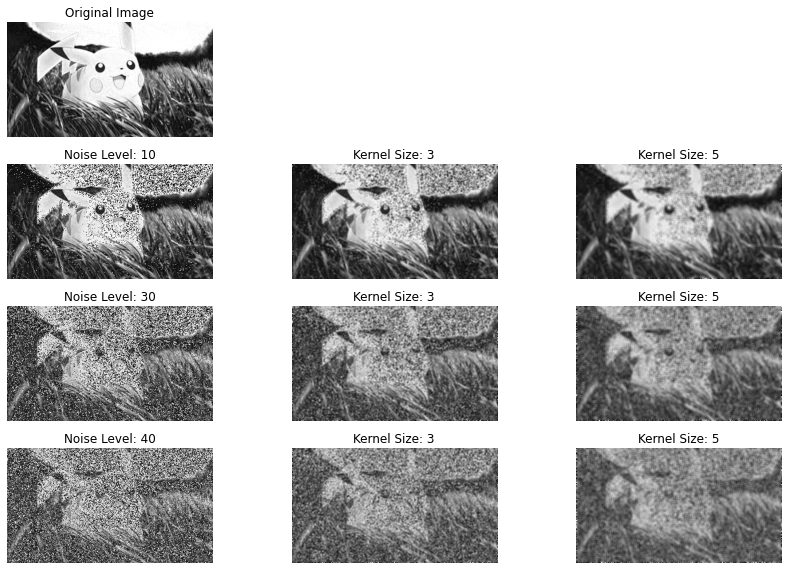

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image using PIL
image_path = r"D:\1st_Year_QMS\2nd_Sem\PR\pikachu_bw.jpeg"
image = Image.open(image_path).convert('L')
image = np.array(image)

# Function to add white Gaussian noise
def add_white_gaussian_noise(image, mean, std_dev):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape
    noise = np.random.normal(mean, std_dev, (row, col))
    noisy_image += noise.astype(np.uint8)
    return noisy_image

# Function to apply mean filtering
def mean_filter(image, kernel_size):
    filtered_image = np.copy(image)
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Extract the region of interest
            region = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            # Apply mean filtering
            filtered_image[i, j] = np.mean(region)

    return filtered_image

# Define noise levels (standard deviations of white Gaussian noise)
noise_levels = [10, 30, 40]

# Define kernel sizes for mean filtering
kernel_sizes = [3, 5]

# Plot original image
plt.figure(figsize=(12, 10))
plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot noisy images with different levels of noise
for i, noise_level in enumerate(noise_levels):
    noisy_image = add_white_gaussian_noise(image, 0, noise_level)
    plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, (i + 1) * (len(kernel_sizes) + 1) + 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'Noise Level: {noise_level}')
    plt.axis('off')

# Plot filtered images with different kernel sizes
for j, kernel_size in enumerate(kernel_sizes):
    for i, noise_level in enumerate(noise_levels):
        noisy_image = add_white_gaussian_noise(image, 0, noise_level)
        filtered_image = mean_filter(noisy_image, kernel_size)
        plt.subplot(len(noise_levels) + 2, len(kernel_sizes) + 1, (i + 1) * (len(kernel_sizes) + 1) + j + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Kernel Size: {kernel_size}')
        plt.axis('off')

plt.tight_layout()
plt.show()